# NNTI Assignment 1
## Prepared by: Team 83
## Team Members:
### Name: Ratnadeep Chakraborty
#### Student ID: 7022859
#### Email: rach00002@@stud.uni-saarland.de

### Name: Md Mobashir Rahman
#### Student ID: 7059086
#### Email: mdra00001@stud.uni-saarland.de

In [28]:
# Import library
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

# Exercise 1

We will use the NumPy python library to generate some data, and in the process get used to
the library functions. Do the following exercise using vectorised numpy operations instead of
python loops.

## 1. generate two sets of points that can be linearly separated in 2D space:

In [29]:
def generate_data():
    
    # Creating two clusters of 100 points with np.random.randn()
    cluster_one = np.random.randn(100, 2)
    cluster_two = np.random.randn(100, 2)

    # Moving the mean of each of the clusters
    cluster_one += np.array([-2, -2])
    cluster_two += np.array([2, 2])

    # Assigning classes to these clusters
    class_one = np.ones((100, 1)) * -1
    class_two = np.ones((100, 1)) * 1

    # Combining and shuffling the points from different clusters
    data_points = np.vstack((cluster_one, cluster_two))
    classes = np.vstack((class_one, class_two))

    combined = np.hstack((data_points, classes))
    np.random.shuffle(combined)

    shuffled_points = combined[:, :2]
    shuffled_classes = combined[:, 2:]

    return shuffled_points, shuffled_classes


shuffled_points, shuffled_classes = generate_data()


## 2. Generate a XOR dataset:

In [30]:
def generate_xor_data():
    points = np.array([[0,0], [0,1], [1,0], [1,1]])

    classes = np.array([x[0] ^ x[1] for x in points])

    classes = np.where(classes == 0, -1, 1)

    classes = classes.reshape(-1, 1)

    return points, classes

points, classes = generate_xor_data()


## 3. Visualising these clusters and their labels as different colors using matplotlib.pyplot.plot

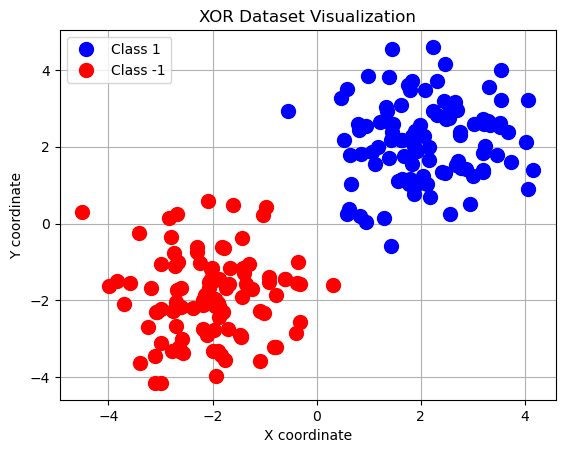

In [31]:
def visualize(points, classes):
    class_one = points[classes.flatten() == 1]
    class_two = points[classes.flatten() == -1]

    plt.plot(class_one[:, 0], class_one[:, 1], 'bo', label="Class 1", markersize=10)
    plt.plot(class_two[:, 0], class_two[:, 1], 'ro', label="Class -1", markersize=10)

    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.title("XOR Dataset Visualization")
    plt.legend()
    plt.grid(True)
    plt.show()

points, classes = generate_data()
visualize(points, classes)

    

# Exercise 2

This exercise will use the scikit-learn library to find a decision boundary to separate your
clusters.

## 1. Using sklearn.svm.LinearSVC to find a linear decision boundary for classification:

In [32]:
def fit_model(points, classes):
    classes = classes.flatten()

    model = LinearSVC()

    model.fit(points, classes)

    return model

points, classes = generate_data()

model = fit_model(points, classes)

## 2. Function to visualise the decision boundary predicted by the model:

In [33]:
def visualize_decision_boundary(model, points, classes):
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)

    plt.scatter(points[:, 0], points[:, 1], c=classes.flatten(), s=100, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.title("Linear Decision Boundary")
    plt.grid(True)
    plt.show()  

### For two of sets of points linearly separated in 2D space:

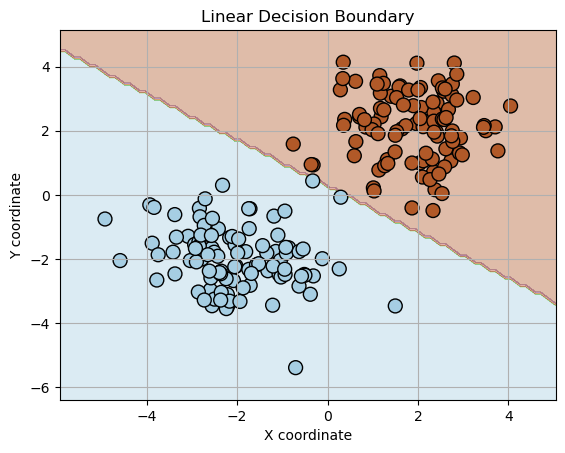

In [34]:
points, classes = generate_data()

model = fit_model(points, classes)

visualize_decision_boundary(model, points, classes)    

### For XOR:

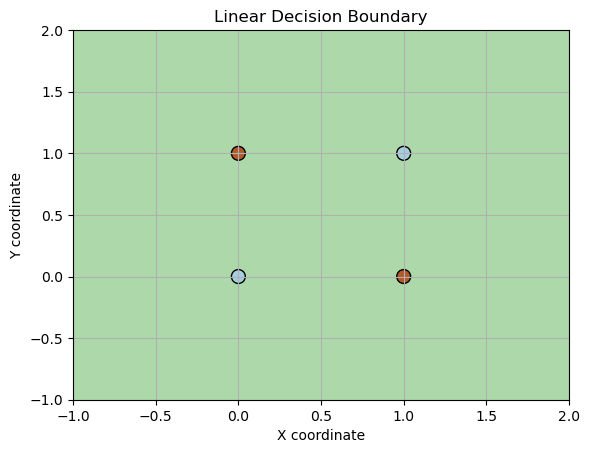

In [35]:
xor_points, xor_classes = generate_xor_data()

xor_model = fit_model(xor_points, xor_classes)

visualize_decision_boundary(xor_model, xor_points, xor_classes)  

# Exercise 3

## 1. 
The first dataset (exercise 1) is **linearly separable** which is why `LinearSVC()` worked on it. There is an (almost) straight line that can separate the two classes. On the other hand, the XOR dataset (exercise 2) requires non-linear separation which is why the dataset was not classified effectively by the function. `LinearSVC()` cannot capture the the complexity pattern as it seeks linear decision boundary for the XOR dataset.

## 2. 
For the linearly seperable dataset (exercise 1), the decision boundary looks **almost unique** for each instance of the dataset generated. Variation in the data during each runs leads to different decision boundaries but the decision boundary is unique in each run. However, depending on the parameter value (such as, c) in `LinearSVC()` it could be different too. 

For the XOR dataset, the linear decision boundary remains **unique** given that the data and model parameters remain fixed, but the classification may not be effective.



## 3. Creating some outliers by flipping the class of randomly selected 8 points in the first dataset:

In [36]:
num_flips = 8
np.random.seed(42)#
flip_indices = np.random.choice(len(classes), size=num_flips, replace=False)
classes_with_outliers = classes.copy()
classes_with_outliers[flip_indices] *= -1

model_outliers = LinearSVC()
model_outliers.fit(points, classes_with_outliers.ravel())


LinearSVC()

## Plotting the differences in decision boundary between original dataset and an dataset with outlier

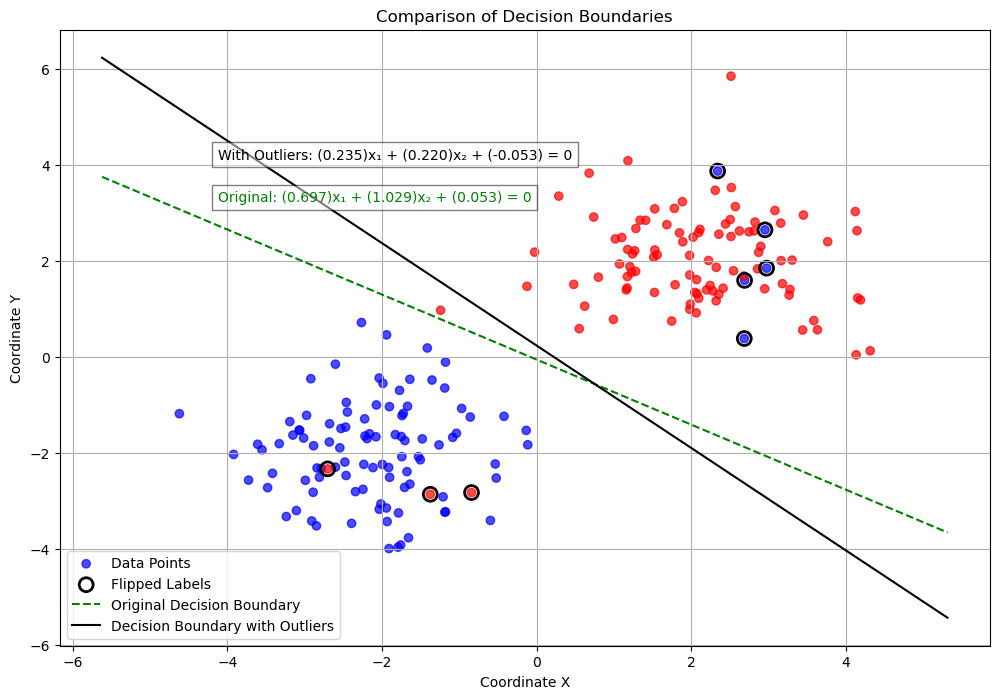

In [37]:
# Seed for reproducibility
np.random.seed(42)

points, classes = generate_data()

# Introduce outliers by flipping class labels of 8 randomly selected points
num_flips = 8
flip_indices = np.random.choice(len(classes), size=num_flips, replace=False)
classes_with_outliers = classes.copy()
classes_with_outliers[flip_indices] *= -1

## Train LinearSVC
# Original
model_original = LinearSVC()
model_original.fit(points, classes.ravel())
# With Outliers
model_outliers = LinearSVC()
model_outliers.fit(points, classes_with_outliers.ravel())


# Weight vector and intercept
# Original
w_original = model_original.coef_[0]
b_original = model_original.intercept_[0]
# With outlier
w_outliers = model_outliers.coef_[0]
b_outliers = model_outliers.intercept_[0]

# Function to plot decision boundary
def plot_decision_boundary(model, color, label):
    
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    xx = np.linspace(x_min, x_max, 100)
    yy = -(model.coef_[0][0] * xx + model.intercept_[0]) / model.coef_[0][1]
    plt.plot(xx, yy, color, label=label)

# Plot data points
plt.figure(figsize=(12, 8))
plt.scatter(points[:, 0], points[:, 1], c=classes_with_outliers.ravel(), cmap='bwr', alpha=0.7, label='Data Points')

# Highlight flipped points
plt.scatter(points[flip_indices, 0], points[flip_indices, 1], facecolors='none', edgecolors='k', s=100, linewidths=2, label='Flipped Labels')

# Plot decision boundaries
plot_decision_boundary(model_original, 'g--', 'Original Decision Boundary')
plot_decision_boundary(model_outliers, 'k-', 'Decision Boundary with Outliers')

# Add equations
x_text = points[:, 0].min() + 0.5
y_text_original = -(w_original[0] * x_text + b_original) / w_original[1]
y_text_outliers = -(w_outliers[0] * x_text + b_outliers) / w_outliers[1]

# Equation strings
equation_original = f"Original: ({w_original[0]:.3f})x₁ + ({w_original[1]:.3f})x₂ + ({b_original:.3f}) = 0"
equation_outliers = f"With Outliers: ({w_outliers[0]:.3f})x₁ + ({w_outliers[1]:.3f})x₂ + ({b_outliers:.3f}) = 0"

# Add text annotations
plt.text(x_text, y_text_original + 0.5, equation_original, color='green', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(x_text, y_text_outliers - 0.5, equation_outliers, color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Plot settings
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')
plt.title('Comparison of Decision Boundaries')
plt.legend()
plt.grid(True)
plt.show()


###  What was the change in the predicted decision boundary?

#### **Observation**:

##### Shift and Rotation of the decision boundary
- The black decision boundary line (with outliers) has shifted compared to the green decision boundary line (original) caused by the flipped class labels of the outliers.

##### Change in equation of the decision boundary:
- The coefficient and weight vector has changed in response to the flipped labels.


#### The plot demonstrates how introducing outliers alters a model's understanding of the data distribution.